In [3]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

In [4]:
df = pd.read_csv("../dataset/dup_preprocessed_covid4.csv")

In [5]:
df.head(60).tail(10)

,clean_tweets,tokenized_tweets,filtered_tokens,stemmed_text
50,dki jakarta menempati posisi dengan penambahan kasus konfirmasi paling banyak yaitu kasus,"['dki', 'jakarta', 'menempati', 'posisi', 'dengan', 'penambahan', 'kasus', 'konfirmasi', 'paling', 'banyak', 'yaitu', 'kasus']","['dki', 'jakarta', 'menempati', 'posisi', 'penambahan', 'kasus', 'konfirmasi', 'banyak', 'kasus']","['dki', 'jakarta', 'tempat', 'posisi', 'tambah', 'kasus', 'konfirmasi', 'banyak', 'kasus']"
51,sejak era pandemi covid pada tahun toko buku gunung agung telah melakukan efisiensi dengan menutup beberapa tokooutlet,"['sejak', 'era', 'pandemi', 'covid', 'pada', 'tahun', 'toko', 'buku', 'gunung', 'agung', 'telah', 'melakukan', 'efisiensi', 'dengan', 'menutup', 'beberapa', 'tokooutlet']","['era', 'pandemi', 'covid', 'toko', 'buku', 'gunung', 'agung', 'efisiensi', 'menutup', 'tokooutlet']","['era', 'pandemi', 'covid', 'toko', 'buku', 'gunung', 'agung', 'efisiensi', 'tutup', 'tokooutlet']"
52,indonesia mencatat sebanyak kasus baru covid minggu dki jakarta menyumbang kasus terbanyak dengan jumlah,"['indonesia', 'mencatat', 'sebanyak', 'kasus', 'baru', 'covid', 'minggu', 'dki', 'jakarta', 'menyumbang', 'kasus', 'terbanyak', 'dengan', 'jumlah']","['indonesia', 'mencatat', 'sebanyak', 'kasus', 'baru', 'covid', 'minggu', 'dki', 'jakarta', 'menyumbang', 'kasus', 'terbanyak', 'jumlah']","['indonesia', 'catat', 'banyak', 'kasus', 'baru', 'covid', 'minggu', 'dki', 'jakarta', 'sumbang', 'kasus', 'banyak', 'jumlah']"
53,kasus covid di indonesia pada minggu bertambah kasus baru sementara kasus sembuh bertambah dan kematian jiwa,"['kasus', 'covid', 'di', 'indonesia', 'pada', 'minggu', 'bertambah', 'kasus', 'baru', 'sementara', 'kasus', 'sembuh', 'bertambah', 'dan', 'kematian', 'jiwa']","['kasus', 'covid', 'indonesia', 'minggu', 'bertambah', 'kasus', 'baru', 'kasus', 'sembuh', 'bertambah', 'kematian', 'jiwa']","['kasus', 'covid', 'indonesia', 'minggu', 'tambah', 'kasus', 'baru', 'kasus', 'sembuh', 'tambah', 'mati', 'jiwa']"
54,wakil katib syuriah pwnu dki jakarta kh taufik damas mengatakan bahwa sisi bisnis juga harus dilihat dari pagelaran konser terutama bagi indonesia yang baru saja bangkita dari pandemi covid simak video selengkapnya hanya di,"['wakil', 'katib', 'syuriah', 'pwnu', 'dki', 'jakarta', 'kh', 'taufik', 'damas', 'mengatakan', 'bahwa', 'sisi', 'bisnis', 'juga', 'harus', 'dilihat', 'dari', 'pagelaran', 'konser', 'terutama', 'bagi', 'indonesia', 'yang', 'baru', 'saja', 'bangkita', 'dari', 'pandemi', 'covid', 'simak', 'video', 'selengkapnya', 'hanya', 'di']","['wakil', 'katib', 'syuriah', 'pwnu', 'dki', 'jakarta', 'kh', 'taufik', 'damas', 'mengatakan', 'sisi', 'bisnis', 'pagelaran', 'konser', 'indonesia', 'baru', 'bangkita', 'pandemi', 'covid', 'simak', 'video']","['wakil', 'katib', 'syuriah', 'pwnu', 'dki', 'jakarta', 'kh', 'taufik', 'damas', 'mengatakan', 'sisi', 'bisnis', 'pagelaran', 'konser', 'indonesia', 'baru', 'bangkita', 'pandemi', 'covid', 'simak', 'video']"
55,berjibaku lalui masa covid siswa man kota probolinggo berhasil lulus,"['berjibaku', 'lalui', 'masa', 'covid', 'siswa', 'man', 'kota', 'probolinggo', 'berhasil', 'lulus']","['berjibaku', 'lalui', 'covid', 'siswa', 'man', 'kota', 'probolinggo', 'berhasil', 'lulus']","['jibaku', 'lalu', 'covid', 'siswa', 'man', 'kota', 'probolinggo', 'hasil', 'lulus']"
56,kasus positif covid di indonesia kembali bertambah pada minggu sehingga total kasus terkonfirmasi positif di indonesia mencapai orang,"['kasus', 'positif', 'covid', 'di', 'indonesia', 'kembali', 'bertambah', 'pada', 'minggu', 'sehingga', 'total', 'kasus', 'terkonfirmasi', 'positif', 'di', 'indonesia', 'mencapai', 'orang']","['kasus', 'positif', 'covid', 'indonesia', 'bertambah', 'minggu', 'total', 'kasus', 'terkonfirmasi', 'positif', 'indonesia', 'mencapai']","['kasus', 'positif', 'covid', 'indonesia', 'tambah', 'minggu', 'total', 'kasus', 'konfirmasi', 'positif', 'indonesia', 'capai']"
57,indonesia mencatat sebanyak kasus baru covid minggu dki 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36711 entries, 0 to 36710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clean_tweets      36711 non-null  object
 1   tokenized_tweets  36711 non-null  object
 2   filtered_tokens   36711 non-null  object
 3   stemmed_text      36711 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


# === MAKE DICTIONARY ===

In [7]:
# import package
import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [8]:
# ubah series dataframe menjadi list
tokenized_tolist = df['stemmed_text'].tolist()

In [9]:
# hasil pengubahan list menjadikan list berformat string dengan tanda petik dua "
print(tokenized_tolist[100:105])

["['positif', 'covid', 'ri', 'tambah', 'pasien', 'sembuh']", "['breaking', 'news', 'kasus', 'covid', 'tambah', 'hari']", "['covid', 'jepang', 'gila', 'tembus', 'ribu', 'kasus']", "['lonjak', 'kasus', 'covid', 'china', 'pabrik', 'paksa', 'tutup']", "['covid', 'rebak', 'china', 'bang', 'saleh', 'ingat', 'pemerintah']"]


In [10]:
# menghilangkan tanda petik 2 " sebelumnya sehingga menjadi list, bukan string
tokenized_text = [t.strip("[]").replace("'", "").split(", ") for t in tokenized_tolist]

In [11]:
# petik 2 sudah hilang
print(tokenized_text[:15])

[['bukti', 'gambar', 'klaim', 'beku', 'darah', 'vaksinasi', 'covid'], ['keliru', 'klaim', 'vaksin', 'covid', 'bas', 'mrna', 'adenoviral', 'turun', 'sistem', 'kebal', 'tubuh'], ['kemenkes', 'tonton', 'konser', 'coldplay', 'booster', 'vaksin', 'covid'], ['jadwal', 'lokasi', 'vaksin', 'covid', 'surabaya', 'hari', 'mei'], ['jadwal', 'lokasi', 'vaksin', 'covid', 'surabaya', 'hari', 'mei'], ['simpel', 'sakit', 'buktibuktinya', 'terang', 'dokter', 'terang', 'kuasa', 'hukum', 'lapor'], ['who', 'cabut', 'status', 'darurat', 'covid', 'kemenkes', 'ri', 'tekan', 'cabut', 'status', 'indonesia', 'tunggu', 'hasil', 'koordinasi', 'menteri'], ['who', 'cabut', 'status', 'darurat', 'covid', 'global', 'status', 'darurat', 'ri', 'cabut', 'nasib', 'vaksin', 'covid', 'buat', 'negeri', 'indovac'], ['pandemi', 'covid', 'gap', 'jarak', 'daya', 'kompetensi', 'generasi', 'butuh', 'usaha'], ['status', 'darurat', 'covid', 'akhir', 'ahli', 'anjur', 'pakai', 'masker', 'klinik'], ['jadwal', 'lokasi', 'vaksin', 'covid'

In [12]:
# membuat dictionary
dictionary = Dictionary(tokenized_text)

In [13]:
dictionary.filter_extremes(no_below=2, no_above=0.8)

In [14]:
# print dictionary kata:id sampai 100 item
print(list(dictionary.token2id.items())[:100])
print('=================')
print('jumlah total dictionary: ' + str(len(dictionary)))

[('beku', 0), ('bukti', 1), ('darah', 2), ('gambar', 3), ('klaim', 4), ('vaksinasi', 5), ('bas', 6), ('kebal', 7), ('keliru', 8), ('mrna', 9), ('sistem', 10), ('tubuh', 11), ('turun', 12), ('vaksin', 13), ('booster', 14), ('kemenkes', 15), ('konser', 16), ('tonton', 17), ('hari', 18), ('jadwal', 19), ('lokasi', 20), ('mei', 21), ('surabaya', 22), ('dokter', 23), ('hukum', 24), ('kuasa', 25), ('lapor', 26), ('sakit', 27), ('simpel', 28), ('terang', 29), ('cabut', 30), ('darurat', 31), ('hasil', 32), ('indonesia', 33), ('koordinasi', 34), ('menteri', 35), ('ri', 36), ('status', 37), ('tekan', 38), ('tunggu', 39), ('who', 40), ('buat', 41), ('global', 42), ('indovac', 43), ('nasib', 44), ('negeri', 45), ('butuh', 46), ('daya', 47), ('gap', 48), ('generasi', 49), ('jarak', 50), ('pandemi', 51), ('usaha', 52), ('ahli', 53), ('akhir', 54), ('anjur', 55), ('klinik', 56), ('masker', 57), ('pakai', 58), ('baru', 59), ('rekomendasi', 60), ('target', 61), ('varian', 62), ('xbb', 63), ('aceh', 64)

# === CREATE CORPUS ===

In [15]:
# make corpus from dictionary with bag-of-words
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

In [16]:
# contoh data corpus
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(4, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(13, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(13, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)], [(15, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1)], [(13, 1), (30, 2), (31, 2), (36, 1), (37, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(31, 1), (37, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]]


In [17]:
# human readable corpus
human_readable_corpus = []
for document in corpus:
    text_document = [(dictionary[id], freq) for id, freq in document]
    human_readable_corpus.append(text_document)

# Print the human-readable corpus
for document in human_readable_corpus[:5]:
    print(document)

[('beku', 1), ('bukti', 1), ('darah', 1), ('gambar', 1), ('klaim', 1), ('vaksinasi', 1)]
[('klaim', 1), ('bas', 1), ('kebal', 1), ('keliru', 1), ('mrna', 1), ('sistem', 1), ('tubuh', 1), ('turun', 1), ('vaksin', 1)]
[('vaksin', 1), ('booster', 1), ('kemenkes', 1), ('konser', 1), ('tonton', 1)]
[('vaksin', 1), ('hari', 1), ('jadwal', 1), ('lokasi', 1), ('mei', 1), ('surabaya', 1)]
[('vaksin', 1), ('hari', 1), ('jadwal', 1), ('lokasi', 1), ('mei', 1), ('surabaya', 1)]


# === COHERENCE SCORE FOR OPTIMAL NUM OF TOPICS ===

In [16]:
coherence_scores = []
min_topics = 1
max_topics = 15
topic_range = range(min_topics, max_topics + 1)  # Specify the range of topic numbers to explore

for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

In [56]:
import matplotlib.pyplot as plt

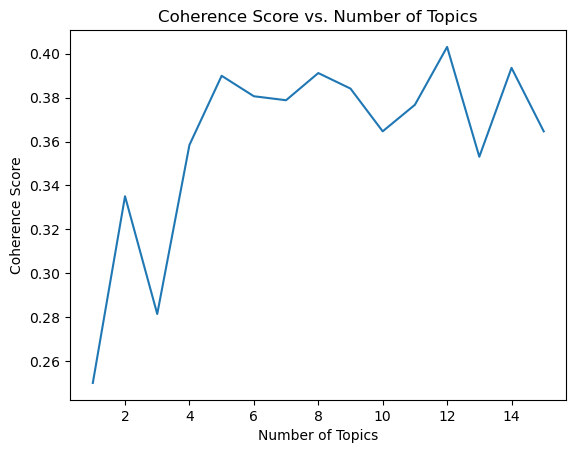

In [18]:
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

In [19]:
for i, num_topics in enumerate(range(min_topics, max_topics+1)):
    coherence_score = coherence_scores[i]
    print("Num Topics =", num_topics, " || Coherence Score =", coherence_score)

Num Topics = 1  || Coherence Score = 0.2501670653750315
Num Topics = 2  || Coherence Score = 0.335104460326354
Num Topics = 3  || Coherence Score = 0.28153127513508003
Num Topics = 4  || Coherence Score = 0.35845562365093125
Num Topics = 5  || Coherence Score = 0.3899114116815209
Num Topics = 6  || Coherence Score = 0.38060243546790445
Num Topics = 7  || Coherence Score = 0.37879187559976385
Num Topics = 8  || Coherence Score = 0.39115699861571535
Num Topics = 9  || Coherence Score = 0.3840905402792098
Num Topics = 10  || Coherence Score = 0.36463839771066614
Num Topics = 11  || Coherence Score = 0.37670797434443454
Num Topics = 12  || Coherence Score = 0.4030442584439657
Num Topics = 13  || Coherence Score = 0.3530663486148781
Num Topics = 14  || Coherence Score = 0.393519123080345
Num Topics = 15  || Coherence Score = 0.36462564942396525


# === TRAIN FINAL LDA MODEL WITH THE CHOSEN NUM OF TOPICS ===

In [32]:
best_num_topics = 12
chunksize = 2000
passes = 45
iterations = 1800
#random_state = 42 # seed so will not re-generate or randomized for the next run
# random_state = 44
best_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_num_topics, 
                                 chunksize=chunksize, passes=passes, iterations=iterations)

# === SHOW ALL TOPIC AND WORDS ===

In [33]:
best_lda_model.show_topics(15)

[(0,
  '0.180*"kasus" + 0.048*"tambah" + 0.046*"hari" + 0.036*"positif" + 0.034*"indonesia" + 0.033*"banyak" + 0.029*"jumlah" + 0.026*"catat" + 0.026*"baru" + 0.022*"jakarta"'),
 (1,
  '0.050*"papar" + 0.042*"gejala" + 0.039*"pasien" + 0.039*"positif" + 0.037*"sakit" + 0.035*"rumah" + 0.029*"jalan" + 0.018*"alami" + 0.017*"milik" + 0.015*"ringan"'),
 (2,
  '0.089*"vaksinasi" + 0.046*"vaksin" + 0.037*"dosis" + 0.029*"jakarta" + 0.028*"booster" + 0.026*"warga" + 0.021*"dki" + 0.020*"capai" + 0.020*"persen" + 0.017*"kota"'),
 (3,
  '0.127*"omicron" + 0.112*"varian" + 0.055*"kasus" + 0.029*"baru" + 0.026*"lonjak" + 0.026*"virus" + 0.022*"temu" + 0.018*"negara" + 0.018*"corona" + 0.018*"infeksi"'),
 (4,
  '0.089*"positif" + 0.051*"jawa" + 0.047*"ptm" + 0.039*"isolasi" + 0.037*"siswa" + 0.029*"barat" + 0.024*"presiden" + 0.024*"henti" + 0.023*"dinyatakan" + 0.021*"bali"'),
 (5,
  '0.079*"pandemi" + 0.028*"indonesia" + 0.026*"pemain" + 0.017*"dunia" + 0.014*"ekonomi" + 0.013*"liga" + 0.012*"d

In [34]:
doc_topics = [best_lda_model.get_document_topics(doc) for doc in corpus]

In [35]:
data_doc_topics = []
for i, doc in enumerate(doc_topics):
    doc_topics = [0] * best_lda_model.num_topics  # Initialize an empty list of topic probabilities
    for topic in doc:
        doc_topics[topic[0]] = topic[1]
    data_doc_topics.append(doc_topics)

In [36]:
column_names = ['Topic{}'.format(i) for i in range(best_lda_model.num_topics)]

In [37]:
df_docs_topic = pd.DataFrame(data_doc_topics, columns=column_names)

In [39]:
df_docs_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11
0,0.011910,0.011910,0.011910,0.011910,0.011910,0.154646,0.011910,0.163792,0.011910,0.011910,0.011910,0.574376
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201986,0.714672
2,0.013891,0.013891,0.013892,0.013891,0.013891,0.013891,0.013891,0.180494,0.013891,0.180528,0.013891,0.513957
3,0.011905,0.011905,0.011905,0.011905,0.011905,0.011905,0.869044,0.011905,0.011905,0.011905,0.011905,0.011906
4,0.011905,0.011905,0.011905,0.011905,0.011905,0.011905,0.869044,0.011905,0.011905,0.011905,0.011905,0.011906
5,0.000000,0.233122,0.000000,0.456688,0.000000,0.121145,0.000000,0.000000,0.000000,0.000000,0.114444,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.092746,0.000000,0.000000,0.000000,0.000000,0.623747,0.233499
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089505,0.073884,0.000000,0.000000,0.640067,0.152052
8,0.010426,0.010426,0.010426,0.010426,0.010426,0.510820,0.010426,0.384923,0.010426,0.010426,0.010426,0.010426
9,0.000000,0.120178,0.000000,0.123006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673459,0.000000


# === DATAFRAME OF ASSIGNED TOPIC AND HIGHEST TOPIC PERCENTAGE CONTRIBUTION SCORE ===

In [40]:
# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


def format_topics_sentences(ldamodel=best_lda_model, corpus=corpus, texts=tokenized_text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_lda_model, corpus=corpus, texts=tokenized_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [41]:
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11,0.5743,"vaksin, anak, booster, usia, vaksinasi, mulai, simak, teliti, level, guna","[bukti, gambar, klaim, beku, darah, vaksinasi, covid]"
1,1,11,0.7147,"vaksin, anak, booster, usia, vaksinasi, mulai, simak, teliti, level, guna","[keliru, klaim, vaksin, covid, bas, mrna, adenoviral, turun, sistem, kebal, tubuh]"
2,2,11,0.5140,"vaksin, anak, booster, usia, vaksinasi, mulai, simak, teliti, level, guna","[kemenkes, tonton, konser, coldplay, booster, vaksin, covid]"
3,3,6,0.8690,"pasien, atlet, wisma, obat, rawat, lokasi, hari, pakar, risiko, nataru","[jadwal, lokasi, vaksin, covid, surabaya, hari, mei]"
4,4,6,0.8690,"pasien, atlet, wisma, obat, rawat, lokasi, hari, pakar, risiko, nataru","[jadwal, lokasi, vaksin, covid, surabaya, hari, mei]"
5,5,3,0.4567,"omicron, varian, kasus, baru, lonjak, virus, temu, negara, corona, infeksi","[simpel, sakit, buktibuktinya, terang, dokter, terang, kuasa, hukum, lapor]"
6,6,10,0.6237,"kesehatan, menteri, pandemi, masyarakat, indonesia, protokol, ppkm, ri, masker, prokes","[who, cabut, status, darurat, covid, kemenkes, ri, tekan, cabut, status, indonesia, tunggu, hasil, koordinasi, menteri]"
7,7,10,0.6401,"kesehatan, menteri, pandemi, masyarakat, indonesia, protokol, ppkm, ri, masker, prokes","[who, cabut, status, darurat, covid, global, status, darurat, ri, cabut, nasib, vaksin, covid, buat, negeri, indovac]"
8,8,5,0.5108,"pandemi, indonesia, pemain, dunia, ekonomi, liga, dampak, usaha, akibat, pulih","[pandemi, covid, gap, jarak, daya, kompetensi, generasi, butuh, usaha]"
9,9,10,0.6735,"kesehatan, menteri, pandemi, masyarakat, indonesia, protokol, ppkm, ri, masker, prokes","[status, darurat, covid, akhir, ahli, anjur, pakai, masker, klinik]"


In [42]:
# export df
df_dominant_topic.to_csv("../dataset/df5_output_lda.csv", encoding="utf-8", index=False)

# === FIND MOST REPRESENTATIVE DOCUMENT FOR EACH TOPIC ===

In [43]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

In [44]:
# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9563,"kasus, tambah, hari, positif, indonesia, banyak, jumlah, catat, baru, jakarta","[update, data, kembang, kasus, covid, indonesia, hari, rabu, tambah, kasus, hari, pasien, positif, covid, hari, capai, kasus, total, jumlah, pasien, positif, covid, kasus]"
1,1,0.9167,"papar, gejala, pasien, positif, sakit, rumah, jalan, alami, milik, ringan","[pasien, jalan, awat, rumah, sakit, daerah, rsud, merauke, alami, gejala, berat]"
2,2,0.9461,"vaksinasi, vaksin, dosis, jakarta, booster, warga, dki, capai, persen, kota","[warga, dki, jakarta, mulai, vaksinasi, covid, booster, masyarakat, penuh, syarat, terima, booster, gratis, booster, tiket, vaksinasi, faskes]"
3,3,0.9427,"omicron, varian, kasus, baru, lonjak, virus, temu, negara, corona, infeksi","[indonesia, masuk, subvarian, omicron, xbb, varian, kraken, subvarian, yakin, varian, corona, mudah, tular, covid, ri, naik]"
4,4,0.9083,"positif, jawa, ptm, isolasi, siswa, barat, presiden, henti, dinyatakan, bali","[yoon, sanha, salah, personel, boy, group, astro, dinyatakan, positif, covid]"
5,5,0.9491,"pandemi, indonesia, pemain, dunia, ekonomi, liga, dampak, usaha, akibat, pulih","[menhan, prabowo, subianto, sebut, indonesia, menangani, krusial, landa, dunia, pandemi, covid, dampak, ekonomi, perang, rusiaukraina, banyak, negara, ambruk]"
6,6,0.9236,"pasien, atlet, wisma, obat, rawat, lokasi, hari, pakar, risiko, nataru","[tower, rumah, sakit, darurat, covid, rsdc, wisma, atlet, siaga, tower, siaga, maret]"
7,7,0.9236,"cegah, baru, pemerintah, lonjak, atur, negeri, perjalanan, antisipasi, libur, lengkap","[satgas, covid, terbit, atur, baru, terkait, karantina, pelaku, perjalanan, negeri, karantina, hari]"
8,8,0.9236,"tes, luhut, hasil, pcr, provinsi, kasus, amerika, serikat, periksa, guru","[jumlah, kasus, covid, hari, provinsi, aceh, sumut, sumbar, riau, kepri, jambi, bengkulu]"
9,9,0.9307,"sekolah, satgas, kota, tutup, penanganan, ajar, depok, bogor, budi, muka","[konser, nyanyi, solo, tulus, cicendo, kota, bandung, bubar, satgas, covid, konser, bubar, panitia, kantong, izin]"


# === AMOUNT OF DOCUMENTS FOR EACH TOPIC-X ===

In [45]:
each_topic_sum = df_dominant_topic.groupby('Dominant_Topic').size().reset_index(name='document_sum')

In [46]:
each_topic_sum.head(15)

,Dominant_Topic,document_sum
0,0,6433
1,1,2258
2,2,4465
3,3,5105
4,4,1266
5,5,3804
6,6,1486
7,7,2769
8,8,1324
9,9,1537


In [47]:
total_docu = each_topic_sum['document_sum'].sum()

In [48]:
print(total_docu)

36711


Text(0.5, 1.0, 'Jumlah Dokumen pada Setiap Topik')

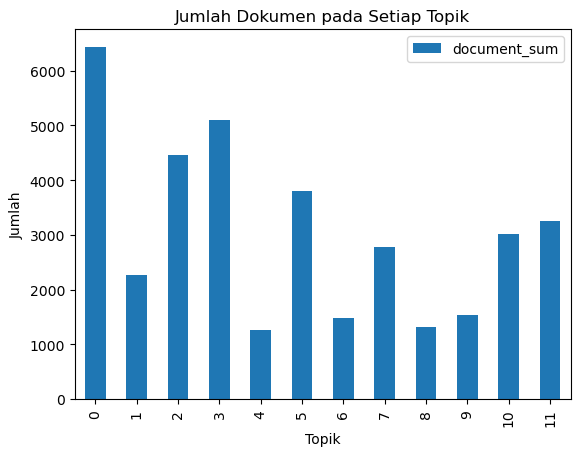

In [49]:
ax = each_topic_sum.plot(x='Dominant_Topic', y='document_sum', kind='bar')

# Set x-label, y-label, and title
ax.set_xlabel('Topik')
ax.set_ylabel('Jumlah')
ax.set_title('Jumlah Dokumen pada Setiap Topik')

# === VISUALIZATION WITH PYLDAVIS ===

In [50]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [51]:
vis_data = gensimvis.prepare(best_lda_model, corpus, dictionary, sort_topics = False)
pyLDAvis.display(vis_data)

In [52]:
pyLDAvis.save_html(vis_data, 'pyldavis-12topic(2)--gensim.html')

In [53]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

# === WORDCLOUD VISUALIZATION ===

In [54]:
from wordcloud import WordCloud
warnings.filterwarnings("ignore", category=DeprecationWarning)

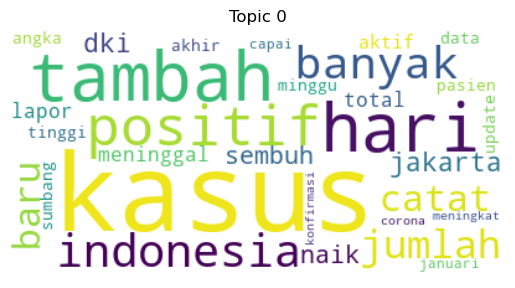

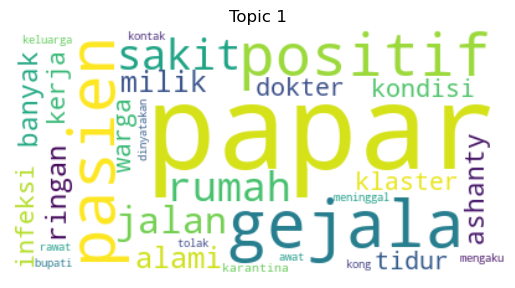

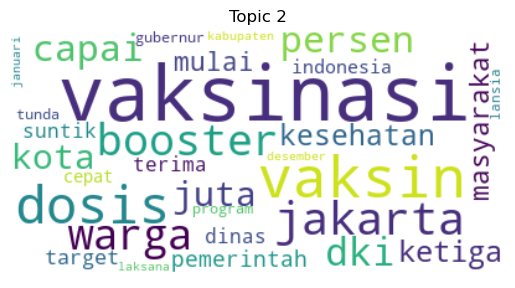

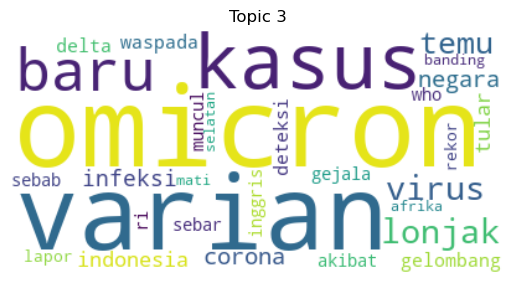

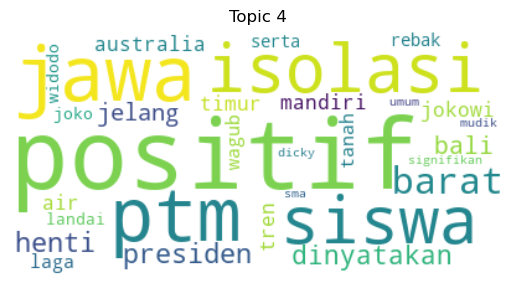

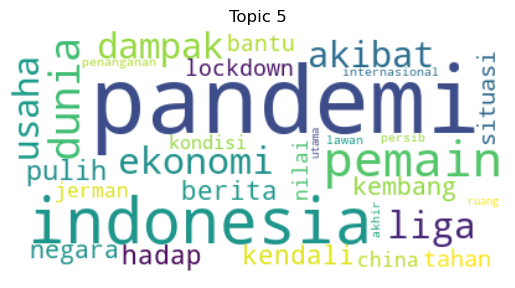

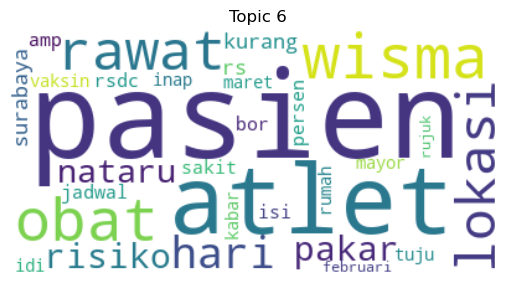

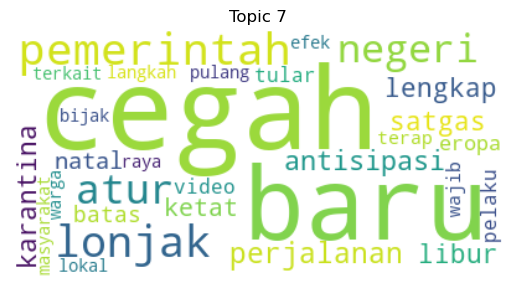

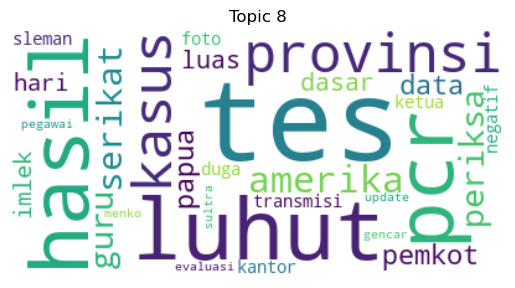

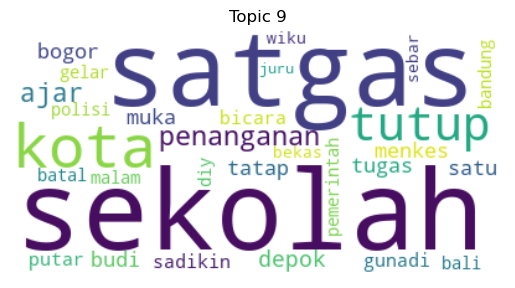

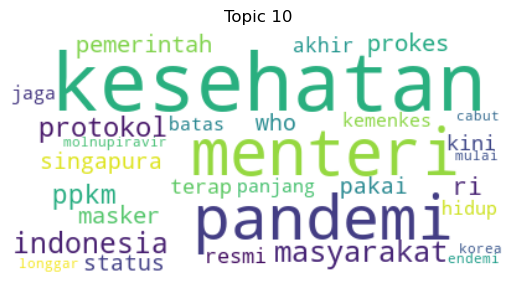

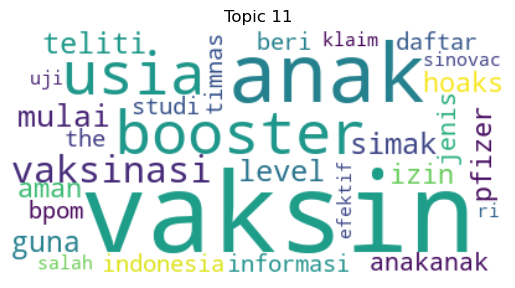

In [57]:
num_topics_wordcloud = best_lda_model.num_topics

# Generate word clouds for each topic
for topic_id in range(num_topics_wordcloud):
    # Get the topic's word distribution
    topic_words = best_lda_model.show_topic(topic_id, topn=30)

    # Create a dictionary of word frequencies
    word_freq = {word: freq for word, freq in topic_words}

    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()

# Jumlah dokumen berdasarkan kategori topik

In [70]:
df_category_topic = each_topic_sum.copy()

In [71]:
df_category_topic.head(20)

,Dominant_Topic,document_sum
0,0,6433
1,1,2258
2,2,4465
3,3,5105
4,4,1266
5,5,3804
6,6,1486
7,7,2769
8,8,1324
9,9,1537


In [72]:
value_mapping = {
    '0': 'Pertambahan kasus baru', '1': 'Gejala pasien terpapar covid', '2': 'Capaian vaksinasi di indonesia', '3': 'Varian baru omicron', '4': 'Kasus positif di Jawa Bali', 
    '5': 'Dampak pandemi di Indonesia', '6': 'Perawatan pasien covid', '7': 'Pencegahan kasus covid', '8': 'Hasil tes pcr', '9': 'Penanganan covid pada sektor pendidikan', 
    '10': 'Kebijakan kemenkes di Indonesia', '11': 'Pembahasan pro kontra vaksin'
}

In [73]:
df_category_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dominant_Topic  12 non-null     int64
 1   document_sum    12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [74]:
df_category_topic['Dominant_Topic'] = df_category_topic['Dominant_Topic'].astype(str).str.strip().replace(value_mapping)

In [75]:
df_category_topic.head(20)

,Dominant_Topic,document_sum
0,Pertambahan kasus baru,6433
1,Gejala pasien terpapar covid,2258
2,Capaian vaksinasi di indonesia,4465
3,Varian baru omicron,5105
4,Kasus positif di Jawa Bali,1266
5,Dampak pandemi di Indonesia,3804
6,Perawatan pasien covid,1486
7,Pencegahan kasus covid,2769
8,Hasil tes pcr,1324
9,Penanganan covid pada sektor pendidikan,1537


Text(0.5, 1.0, 'Jumlah Dokumen pada Setiap Topik')

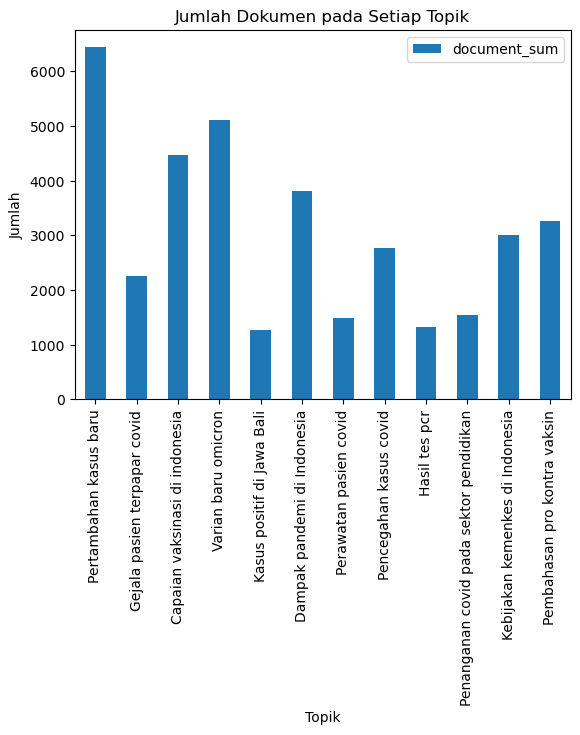

In [76]:
ax2 = df_category_topic.plot(x='Dominant_Topic', y='document_sum', kind='bar')

# Set x-label, y-label, and title
ax2.set_xlabel('Topik')
ax2.set_ylabel('Jumlah')
ax2.set_title('Jumlah Dokumen pada Setiap Topik')